# **PRACTICA 6:**
## **Métodos basados en instancias**
---
### Marta Jiménez Pacheco

En el módulo Sklearn de Python hay un conjunto de datos de dígitos manuscritos. Con él se va a
realizar esta práctica. En síntesis, cada instancia es una matriz de 8x8 pixels correspondiente a
dígitos manuscritos de 0 a 9. La magnitud de cada atributo (pixel) sería la intensidad en una escala
de grises que va desde cero (pixel en blanco), hasta un valor máximo que depende de la
implementación (DESCR). 

Antes de seguir adelante, deberá separar un conjunto de muestras para aprendizaje y otro para test
basándose en en el método de resorte tomando la razón habitual de ⅔ y ⅓.

A continuación, se harán varios experimentos de clasificación aplicando el método de los k vecinos
más próximos, que en python se lleva a cabo con:

•sklearn.neighbors.KneighborsClassifier

De entre sus argumentos, aparte del número k, aparece otro denominado “algorithm”. Aquí hay que
usar el denominado “brute”, ya que corresponde con el más simple descrito en la clase de teoría.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, make_blobs
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datos = load_digits()

In [3]:
x = datos.data
y = datos.target #en este caso no hace falta hacer el escalado, ya que todos los atributos son pixeles

In [4]:
tabla = pd.DataFrame(x,columns=datos.feature_names)
#tabla.insert(loc=len(tabla.columns), column="Class", value=datos.target) 
tabla['Class']= y

In [5]:
tabla

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


### Estratificar

In [6]:
X_train,X_test,y_train,y_test=train_test_split(x,y,
                                               random_state=554,
                                               test_size=0.33,
                                               stratify=y)

### Parte I:
Variando el k entre 1 y 15, ejecutar el algoritmo Kvecino y obtener su tasa de aciertos para el conjunto de
test. Representar este valor en un diagrama de barras, calcular el k óptimo y dar su correspondiente
tasa de aciertos.

In [7]:
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [8]:
valoresK = np.array([])
for k in range(1,16):
    KNN = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute')
    KNN.fit(X_train,y_train)
    prediccion = KNN.predict(X_test)
    tasaAciertos = accuracy_score(y_test,prediccion)
    valoresK = np.append(valoresK,tasaAciertos)
valoresK

array([0.98989899, 0.99158249, 0.98989899, 0.98821549, 0.98989899,
       0.98653199, 0.98653199, 0.98821549, 0.98989899, 0.98316498,
       0.98148148, 0.97979798, 0.98316498, 0.97643098, 0.97811448])

#### Representar este valor en un diagrama de barras, calcular el k óptimo y dar su correspondiente tasa de aciertos.

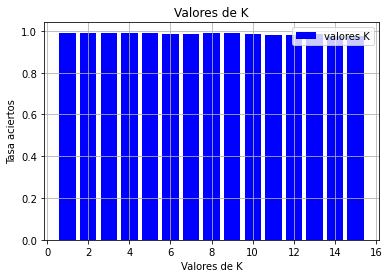

In [9]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1,16,dtype='int')   #numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
                                  #Return evenly spaced values within a given interval.
plt.bar(n,valoresK,color='blue',label='valores K') #label es para legend
plt.legend()
plt.title("Valores de K")
plt.xlabel("Valores de K")
plt.ylabel("Tasa aciertos")
plt.grid()
plt.show()

In [10]:
min = valoresK.min()

print("K óptimo: ")
print(np.where(valoresK==min)[0][0]+1)
print("\nTasa de aciertos: ")
print(min)

K óptimo: 
14

Tasa de aciertos: 
0.9764309764309764


## Parte 2
Lo mismo que lo anterior, sólo que los píxeles hay que reducirlos a bits, esto es, poner uno si el
pixel no era cero y dejar el cero, si ya lo era.

In [11]:
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if(x[i,j]!=0):
            x[i,j]=1
x

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [12]:
tabla2 = pd.DataFrame(x,columns=datos.feature_names)
tabla2['Class']= y
tabla2.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Class
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4


In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,
                                               random_state=554,
                                               test_size=0.33,
                                               stratify=y)

In [14]:
valoresK = np.array([])
for k in range(1,16):
    KNN = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute')
    KNN.fit(X_train,y_train)
    prediccion = KNN.predict(X_test)
    tasaAciertos = accuracy_score(y_test,prediccion)
    valoresK = np.append(valoresK,tasaAciertos)
valoresK

array([0.88383838, 0.86700337, 0.88552189, 0.8989899 , 0.9040404 ,
       0.8973064 , 0.9023569 , 0.8989899 , 0.9006734 , 0.9006734 ,
       0.9023569 , 0.8956229 , 0.8989899 , 0.89393939, 0.9023569 ])

#### Representar este valor en un diagrama de barras, calcular el k óptimo y dar su correspondiente tasa de aciertos.

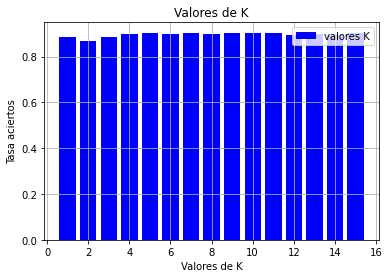

In [15]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1,16,dtype='int')   #numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
                                  #Return evenly spaced values within a given interval.
plt.bar(n,valoresK,color='blue',label='valores K') #label es para legend
plt.legend()
plt.title("Valores de K")
plt.xlabel("Valores de K")
plt.ylabel("Tasa aciertos")
plt.grid()
plt.show()

In [16]:
min = valoresK.min()

print("K óptimo: ")
print(np.where(valoresK==min)[0][0]+1)
print("\nTasa de aciertos: ")
print(min)

K óptimo: 
2

Tasa de aciertos: 
0.867003367003367
